In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call

In [57]:
N, er, ar = 35, 1.5, 20.0
filename = f'Galla/{N}_bots/sim_fp_results_er_{er}_NOPUSH.csv'
df = pd.read_csv(filename)
df = df.rename(columns={'lambda':'lamb'})

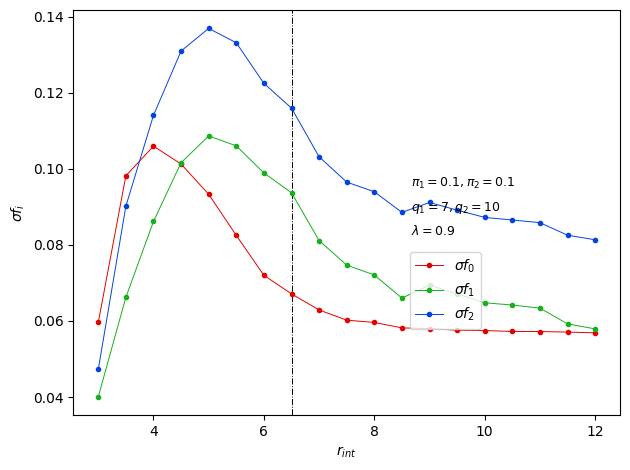

In [60]:
# experiment conditions:
pi1, pi2, q1, q2, l = 0.1, 0.1, 7, 10, 0.9
df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & lamb == @l')
fig, ax = plt.subplots()
ax.axvline(6.5, lw=0.7, ls='-.', color='xkcd:black')
ax.plot(df_exp['interac_r'], df_exp['sdf0'], lw=0.7, marker='.', color='xkcd:red', label=r'$\sigma f_0$')
ax.plot(df_exp['interac_r'], df_exp['sdf1'], lw=0.7, marker='.', color='xkcd:green', label=r'$\sigma f_1$')
ax.plot(df_exp['interac_r'], df_exp['sdf2'], lw=0.7, marker='.', color='xkcd:blue', label=r'$\sigma f_2$')
ax.set(xlabel=r'$r_{int}$', ylabel=r'$\sigma f_i$')
fig.text(0.65, 0.6, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}$', fontsize=9)
fig.text(0.65, 0.55, fr'$q_1 = {q1}, q_2 = {q2}$', fontsize=9)
fig.text(0.65, 0.5, fr'$\lambda = {l}$', fontsize=9)
fig.legend(loc=(0.65,0.3))
fig.tight_layout()
fig.savefig(f'fluctuations_fs_var_ir_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_N_{N}_ar_{ar}_er_{er}.png')

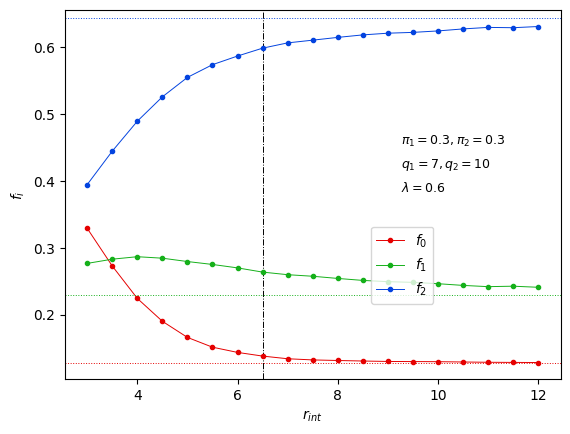

In [55]:
# experiment conditions:
pi1, pi2, q1, q2, l = 0.3, 0.3, 7, 10, 0.6
df_exp = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & lamb == @l')
fig, ax = plt.subplots()
ax.axvline(6.5, lw=0.7, ls='-.', color='xkcd:black')
ax.plot(df_exp['interac_r'], df_exp['f0'], lw=0.7, marker='.', color='xkcd:red', label=r'$f_0$')
ax.plot(df_exp['interac_r'], df_exp['f1'], lw=0.7, marker='.', color='xkcd:green', label=r'$f_1$')
ax.plot(df_exp['interac_r'], df_exp['f2'], lw=0.7, marker='.', color='xkcd:blue', label=r'$f_2$')
# get the mean field values:
call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} > sols.dat', shell=True)
with open('sols.dat', 'r') as file:
    sols = [float(f) for f in file.readline().split()]
ax.axhline(sols[0], color='xkcd:red', ls=':', lw=0.7)
ax.axhline(sols[1], color='xkcd:green', ls=':', lw=0.7)
ax.axhline(sols[2], color='xkcd:blue', ls=':', lw=0.7)
ax.set(xlabel=r'$r_{int}$', ylabel=r'$f_i$')
fig.text(0.65, 0.6, fr'$\pi_1 = {pi1}, \pi_2 = {pi2}$', fontsize=9)
fig.text(0.65, 0.55, fr'$q_1 = {q1}, q_2 = {q2}$', fontsize=9)
fig.text(0.65, 0.5, fr'$\lambda = {l}$', fontsize=9)
fig.legend(loc=(0.65,0.3))
